# dev-keplerian-energy-LPO

Checking keplerian energy values along a LPO

In [1]:
using LinearAlgebra
using DataFrames
using Plots
using DifferentialEquations

In [2]:
gr()

Plots.GRBackend()

In [3]:
include("../R3BP/src/R3BP.jl")

Main.R3BP

In [4]:
reltol = 1.e-13
abstol = 1.e-13
method = Tsit5()

Tsit5()

In [73]:
# construct halo
CR3BP_param = R3BP.get_cr3bp_param(10, 299)
lp = 2
Az_km = 260*1e3
println("Halo guess Az_km: $Az_km")
northsouth = 3   # 1 or 3
guess0 = R3BP.halo_analytical_construct(CR3BP_param.mu, lp, Az_km, CR3BP_param.lstar, northsouth)
res = R3BP.ssdc_periodic_xzplane(CR3BP_param.mu, guess0.x0, guess0.period, fix="z");

Halo guess Az_km: 260000.0
Converged at iteration 5


In [74]:
"""
    _rotating2inertial(state_r, theta::Float64, om::Float64)

Conversion of state-vector from rotating to inertial frame
Ref: See Zimovan thesis 2017 pg.54
"""
function _rotating2inertial(state_r, theta::Float64, om::Float64)
    # construct transformation matrix
    rotmat = [ cos(theta) -sin(theta) 0.0 0.0 0.0 0.0;
               sin(theta)  cos(theta) 0.0 0.0 0.0 0.0;
               0.0         0.0        1.0 0.0 0.0 0.0;
               -om*sin(theta) -om*cos(theta) 0.0 cos(theta) -sin(theta) 0.0;
                om*cos(theta) -om*sin(theta) 0.0 sin(theta)  cos(theta) 0.0;
                0.0            0.0           0.0 0.0         0.0        1.0]
    # transform
    state_i = rotmat * state_r
    return state_i
end

_rotating2inertial

In [75]:
"""
    list_to_plotarray(sollist, state_idx_x, state_idx_y)

Function for plotting from list of states in 2D
"""
function list_to_plotarray(sollist, state_idx_x, state_idx_y)
    x_plot, y_plot = [], []
    for k = 1:length(sollist)
        push!(x_plot, sollist[k][state_idx_x])
        push!(y_plot, sollist[k][state_idx_y])
    end
    return x_plot, y_plot
end

list_to_plotarray

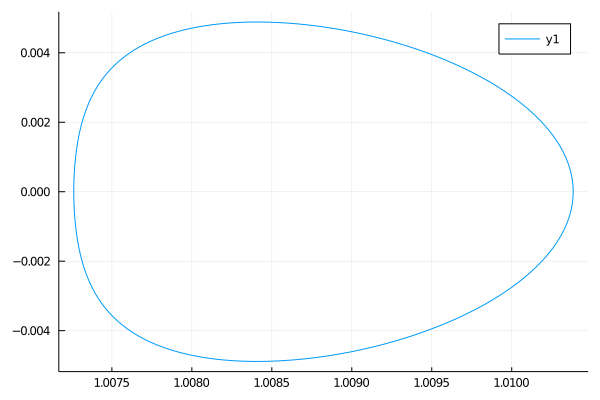

In [76]:
x_plot, y_plot = list_to_plotarray(res.sol.u, 1, 2)

plpo = plot()
plot!(plpo, x_plot, y_plot)

In [77]:
# compute energy at each step w.r.t. planet
om = 1.0
totalEs = []
for u in res.sol.u
    # inertialize
    u_inr = _rotating2inertial(u, 0.0, om)
    # compute specific energy from state-vector
    kineticE = norm(u[4:6])^2
    potentialE = -CR3BP_param.mu/norm(u[1:3])
    totalE = kineticE + potentialE
    push!(totalEs, totalE)
end

In [78]:
u_inr = _rotating2inertial(res.sol.u[1], 0.0, om)

6-element Array{Float64,1}:
  1.0072617364239098
  0.0
 -0.002147558386821189
  0.0
  1.018220113205993
  0.0

In [79]:
totalEs

182-element Array{Any,1}:
 0.00011765584228814145
 0.0001176501833987471
 0.000117625023120138
 0.00011756863905390362
 0.00011746489150356995
 0.00011729964684804816
 0.00011705683802105061
 0.00011672368427697124
 0.000116287953259385
 0.00011574062138860821
 0.00011507424457782664
 0.00011428392808912911
 0.00011336636175638557
 ⋮
 0.00010949503779594568
 0.00011100539915083296
 0.00011235900892467568
 0.00011355640603157797
 0.00011459832937832914
 0.0001154856772705931
 0.00011621949805073675
 0.0001168009409029347
 0.00011723127378235473
 0.0001175118484446063
 0.00011764411786599084
 0.00011765584234894626